In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('social_media_data.csv')

In [3]:
data.head()

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [5]:
data.dtypes

date          object
platform      object
post_type     object
likes        float64
shares       float64
comments     float64
views        float64
dtype: object

In [6]:
data.shape

(2000, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      1992 non-null   float64
 4   shares     1992 non-null   float64
 5   comments   1992 non-null   float64
 6   views      1990 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [11]:
data = data.fillna(0)

</br>

## 1. What was the total number of likes, shares, comments, and views (for videos) over the year?

In [14]:
interact_post_type = data.groupby('post_type')[['likes', 'shares', 'comments','views']].sum()
interact_post_type

,likes,shares,comments,views
post_type,,,,
image,928510.0,362233.0,225818.0,5037675.0
text,824592.0,317322.0,189292.0,4361595.0
video,816170.0,311040.0,194139.0,4464731.0


In [26]:
video_data = data[data['post_type'] == 'video']
video_data = video_data[['likes', 'shares', 'comments', 'views']].sum()
video_data

likes        816170.0
shares       311040.0
comments     194139.0
views       4464731.0
dtype: float64

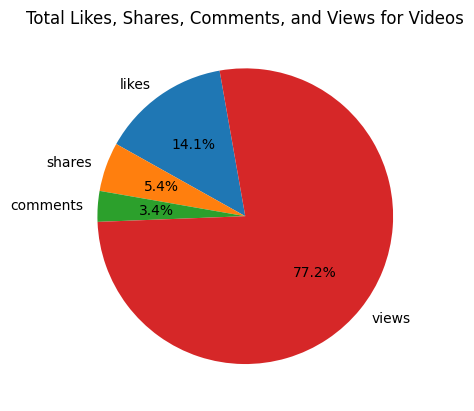

In [36]:
plt.pie(video_data, labels=video_data.index, autopct='%1.1f%%', startangle=100)
plt.title('Total Likes, Shares, Comments, and Views for Videos')
plt.show()

</br>

## 2. Which platform had the highest engagement?</br> 
(engagement = likes + shares + comments)

In [111]:
data_eng = data.groupby('platform')[['likes','shares','comments']].sum()
data_eng['engagement'] = data_eng[['likes','shares','comments']].sum(axis=1)
data_eng

,likes,shares,comments,engagement
platform,,,,
Facebook,807529.0,322766.0,196031.0,1326326.0
Instagram,882746.0,335229.0,202604.0,1420579.0
NonExistingPlatform,6901.0,3095.0,1713.0,11709.0
Twitter,872096.0,329505.0,208901.0,1410502.0


In [112]:
data_eng['engagement'].max()

1420579.0

### ***Instagram*** has the highest engagement

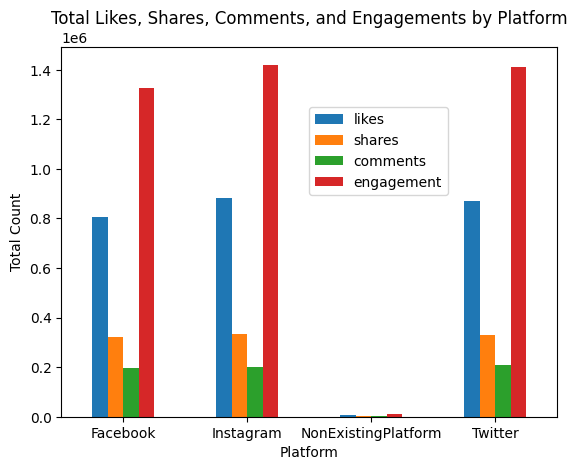

In [135]:
data_eng.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Count')
plt.title('Total Likes, Shares, Comments, and Engagements by Platform')
plt.legend(loc=(0.5, 0.6))
plt.xticks(rotation=0)
plt.show()

</br>

## 3. What was the average number of likes, shares, comments, and views per post on each platform?

In [83]:
data_avg = data.groupby('platform')[['likes','shares','comments','views']].mean().round(3)
data_avg

,likes,shares,comments,views
platform,,,,
Facebook,1279.761,511.515,310.667,6939.965
Instagram,1301.985,494.438,298.826,6875.319
NonExistingPlatform,1150.167,515.833,285.500,6729.167
Twitter,1273.133,481.029,304.965,6982.543


</br>

## 4. What was the total number of each type of post (video, image, text) on each platform?

In [90]:
post_counts = data.groupby(['platform', 'post_type']).size().unstack(fill_value=0)
post_counts

post_type,image,text,video
platform,,,
Facebook,218,204,209
Instagram,267,203,208
NonExistingPlatform,1,3,2
Twitter,249,219,217


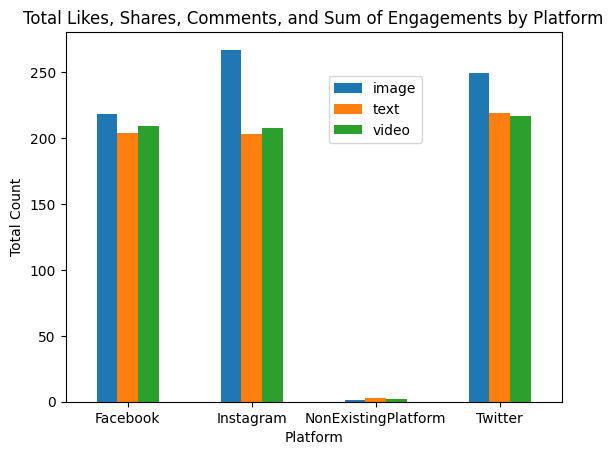

In [141]:
post_counts.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Count')
plt.title('Total Likes, Shares, Comments, and Sum of Engagements by Platform')
plt.xticks(rotation=0)
plt.legend(loc=(0.53, 0.7))
plt.show()

</br>

## 5. Which type of post had the highest average engagement?

In [109]:
post_eng = data.groupby('post_type')[['likes','shares','comments','views']].mean().round(3)
post_eng['total Avg'] = post_eng[['likes','shares','comments','views']].mean(axis=1).round(3)
post_eng

,likes,shares,comments,views,total Avg
post_type,,,,,
image,1263.279,492.834,307.235,6853.980,2229.332
text,1310.957,504.486,300.941,6934.173,2262.639
video,1283.286,489.057,305.250,7020.017,2274.402


In [110]:
post_eng['total Avg'].max()

2274.402

### ***Video*** has the highest average engagement

</br>

## 6. What was the total engagement in each quarter of the year?

In [142]:
data.head()

,date,platform,post_type,likes,shares,comments,views
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0


In [143]:
data.dtypes

date          object
platform      object
post_type     object
likes        float64
shares       float64
comments     float64
views        float64
dtype: object

In [144]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month

In [145]:
data.head()

,date,platform,post_type,likes,shares,comments,views,month
0,2023-05-24,Twitter,image,868.0,238.0,352.0,8836.0,5
1,2023-02-23,Twitter,image,944.0,610.0,146.0,5554.0,2
2,2023-03-18,Instagram,image,1067.0,858.0,365.0,4018.0,3
3,2023-06-12,Twitter,text,780.0,427.0,100.0,6999.0,6
4,2023-02-03,Instagram,text,836.0,893.0,443.0,5802.0,2


In [153]:
data_by_month = data.groupby('month')[['likes', 'shares', 'comments', 'views']].sum()
data_by_month['total'] = data_by_month[['likes', 'shares', 'comments', 'views']].sum(axis=1)
data_by_month = data_by_month['total']
data_by_month

month
1     1508416.0
2     1437688.0
3     1612702.0
4     1326769.0
5     1527292.0
6     1407184.0
7     1386949.0
8     1357666.0
9     1530013.0
10    1846096.0
11    1466508.0
12    1625834.0
Name: total, dtype: float64

In [154]:
Q1 = (data_by_month[1]+data_by_month[2]+data_by_month[3])
Q2 = (data_by_month[4]+data_by_month[5]+data_by_month[6])
Q3 = (data_by_month[7]+data_by_month[8]+data_by_month[9])
Q4 = (data_by_month[10]+data_by_month[11]+data_by_month[12])

In [155]:
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)
print("Q4:", Q4)

Q1: 4558806.0
Q2: 4261245.0
Q3: 4274628.0
Q4: 4938438.0


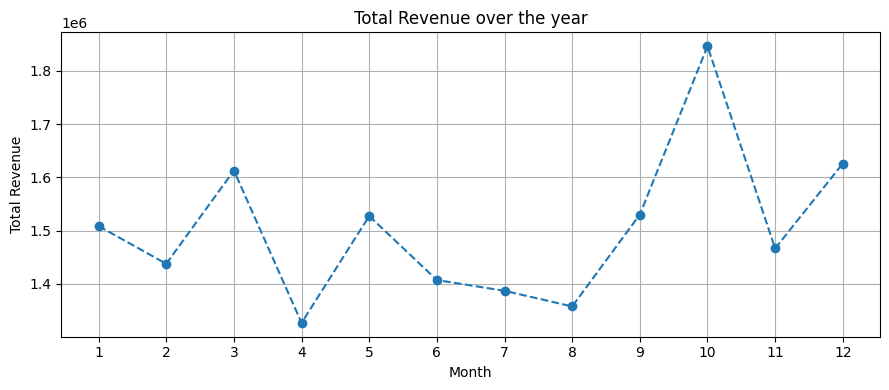

In [159]:
plt.figure(figsize=(9, 4))
plt.plot(data_by_month.index, data_by_month.values, marker='o', linestyle='--')
plt.title('Total Revenue over the year')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(data_by_month.index)
plt.grid(True)
plt.tight_layout()
plt.show()